In [1]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist

4422102/4422102 [==============================] - 0s 0us/step


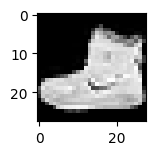

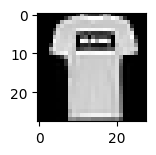

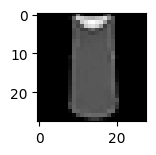

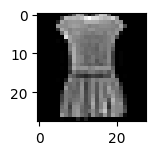

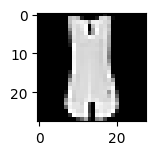

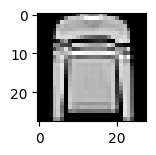

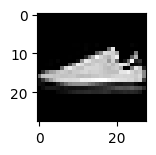

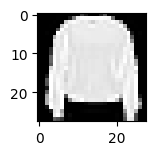

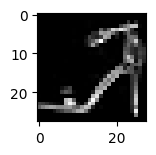

In [2]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(train_X[i],cmap='gray')
  plt.show()

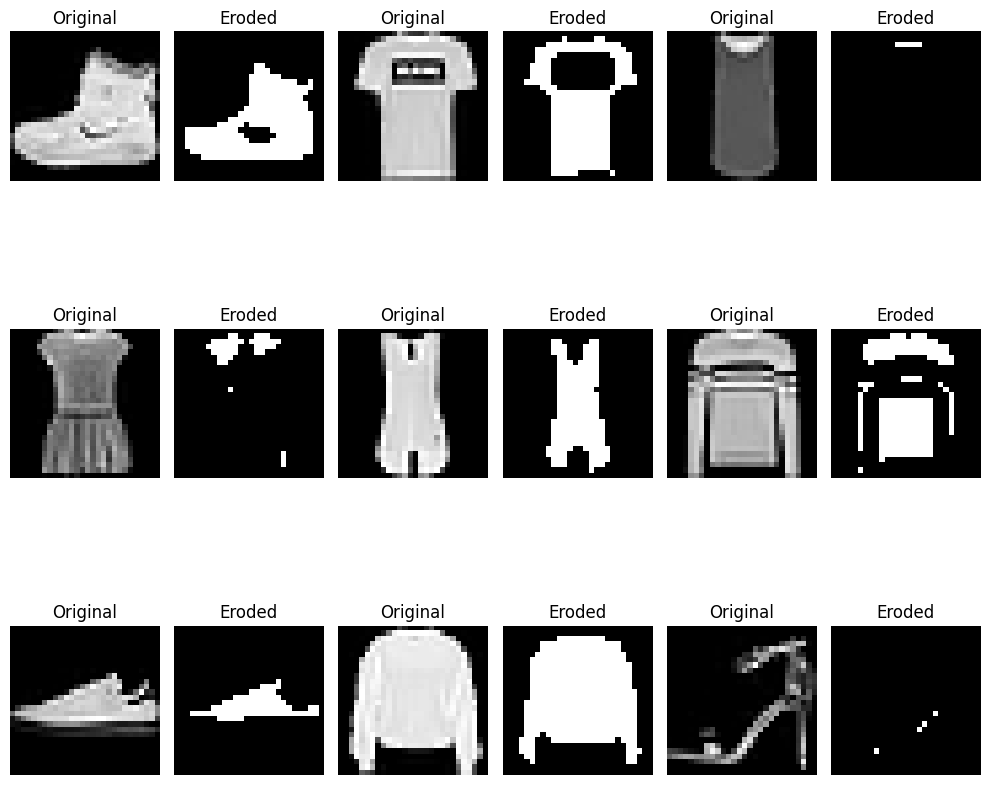

In [15]:
from scipy.ndimage import binary_erosion

def binarize_images(images, threshold=127):
    binary_images = np.where(images > threshold, 1, 0)
    return binary_images

binary_train_X = binarize_images(train_X)

def apply_erosion(images, iterations=1):
    eroded_images = np.zeros_like(images)
    for i in range(images.shape[0]):
        eroded_images[i] = binary_erosion(images[i], iterations=iterations)
    return eroded_images

eroded_train_X = apply_erosion(binary_train_X)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 6, 2*i+1)
    plt.imshow(train_X[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(3, 6, 2*i+2)
    plt.imshow(eroded_train_X[i], cmap='gray')
    plt.title("Eroded")
    plt.axis('off')

plt.tight_layout()
plt.show()


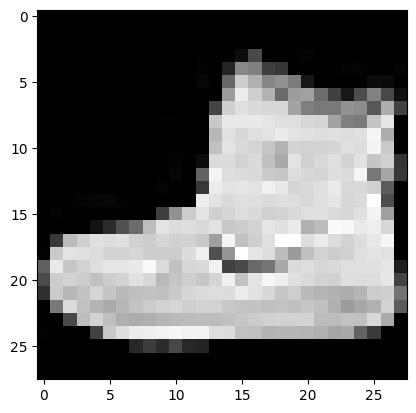

In [16]:
img=train_X[0]
kernel = np.ones((5, 5), np.uint8)
img_erosion = cv2.erode(img, kernel, iterations=1)
plt.imshow( img,cmap='gray')


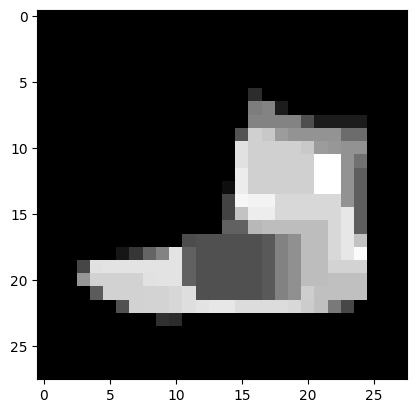

In [17]:
plt.imshow( img_erosion,cmap='gray')

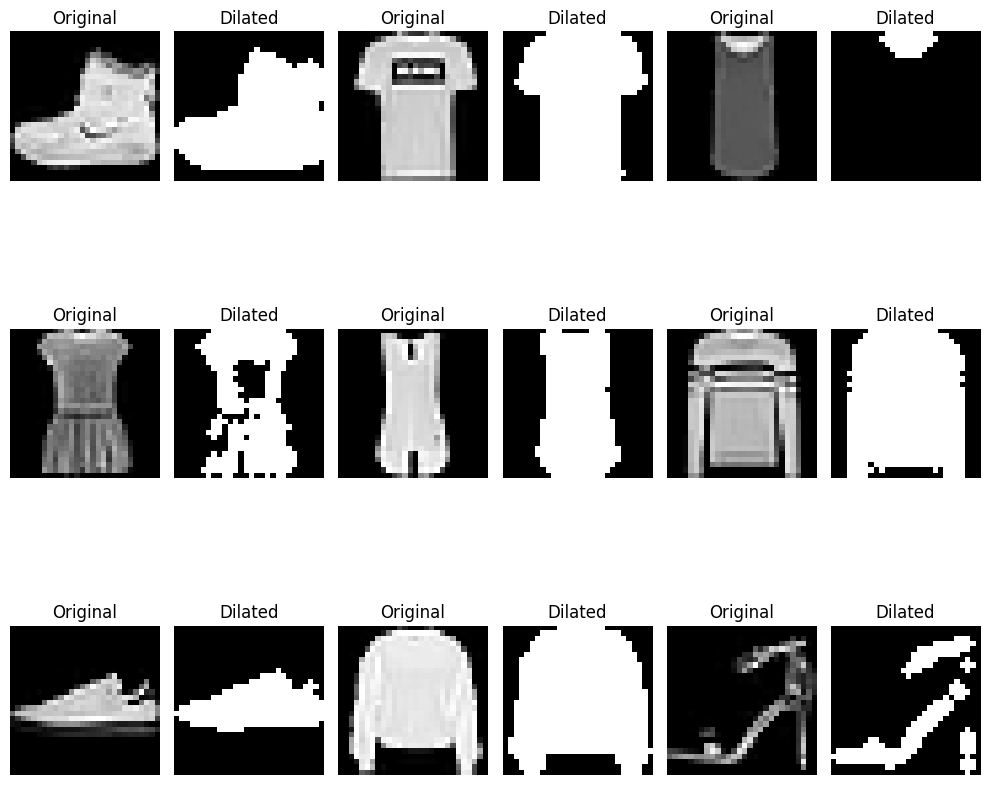

In [19]:
from scipy.ndimage import binary_dilation

def binarize_images(images, threshold=127):
    binary_images = np.where(images > threshold, 1, 0)
    return binary_images

binary_train_X = binarize_images(train_X)

def apply_dilation(images, iterations=1):
    dilated_images = np.zeros_like(images)
    for i in range(images.shape[0]):
        dilated_images[i] = binary_dilation(images[i], iterations=iterations)
    return dilated_images

dilated_train_X = apply_dilation(binary_train_X)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 6, 2*i+1)
    plt.imshow(train_X[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(3, 6, 2*i+2)
    plt.imshow(dilated_train_X[i], cmap='gray')
    plt.title("Dilated")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [20]:
dataset_dir = '/content/covid'

In [23]:
import os
import cv2
import matplotlib.pyplot as plt

def binarize_image(image, threshold=127):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)
    return binary_image

dataset_dir = "/content/covid"

def apply_erosion_cv2(image, kernel_size=(3, 3), iterations=1):
    kernel = np.ones(kernel_size, np.uint8)
    eroded_image = cv2.erode(image, kernel, iterations=iterations)
    return eroded_image

for filename in os.listdir(dataset_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
        image = cv2.imread(os.path.join(dataset_dir, filename))
        binary_image = binarize_image(image)
        eroded_image = apply_erosion_cv2(binary_image)

        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.imshow(eroded_image, cmap='gray')
        plt.title('Eroded Image')

        plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [25]:
import os
import cv2
import matplotlib.pyplot as plt

def binarize_image(image, threshold=127):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)
    return binary_image

# Directory containing images
dataset_dir = "/content/covid"

# Function to apply dilation to images using cv2.dilate()
def apply_dilation_cv2(image, kernel_size=(3, 3), iterations=1):
    kernel = np.ones(kernel_size, np.uint8)
    dilated_image = cv2.dilate(image, kernel, iterations=iterations)
    return dilated_image

for filename in os.listdir(dataset_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
        image = cv2.imread(os.path.join(dataset_dir, filename))
        binary_image = binarize_image(image)
        dilated_image = apply_dilation_cv2(binary_image)

        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.imshow(dilated_image, cmap='gray')
        plt.title('Dilated Image')

        plt.show()


Output hidden; open in https://colab.research.google.com to view.

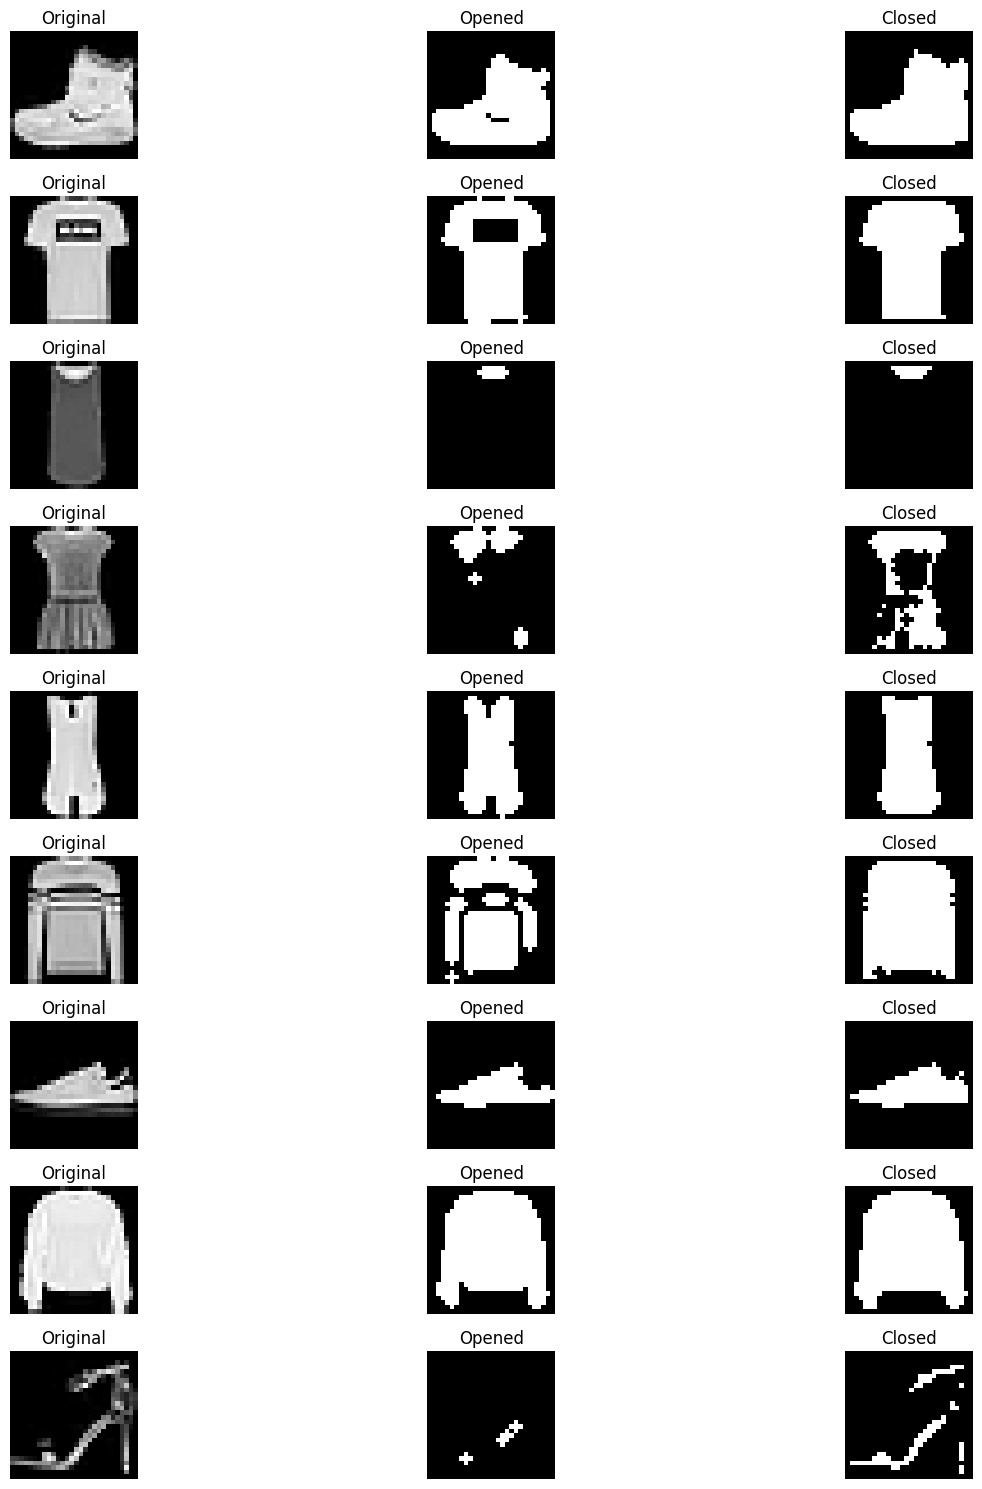

In [30]:
from scipy.ndimage import binary_opening, binary_closing
binary_train_X = binarize_images(train_X)
binary_test_X = binarize_images(test_X)

def apply_opening(images, iterations=1):
    opened_images = np.zeros_like(images)
    for i in range(images.shape[0]):
        opened_images[i] = binary_opening(images[i], iterations=iterations)
    return opened_images

def apply_closing(images, iterations=1):
    closed_images = np.zeros_like(images)
    for i in range(images.shape[0]):
        closed_images[i] = binary_closing(images[i], iterations=iterations)
    return closed_images

opened_train_X = apply_opening(binary_train_X)
closed_train_X = apply_closing(binary_train_X)

plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(9, 3, i*3+1)
    plt.imshow(train_X[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(9, 3, i*3+2)
    plt.imshow(opened_train_X[i], cmap='gray')
    plt.title("Opened")
    plt.axis('off')

    plt.subplot(9, 3, i*3+3)
    plt.imshow(closed_train_X[i], cmap='gray')
    plt.title("Closed")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [39]:
pip install mahotas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 1.3 MB/s eta 0:00:00


In [41]:
import mahotas as mh
template = np.array([
            [0, 1, 1],
            [0, 1, 1],
            [0, 1, 1]])

# hit miss transform
img = mahotas.hitmiss(train[0], template)

NameError: name 'mahotas' is not defined